https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/d32b0c36ff484c228b8117257349d0e6/27bfa0a7d1304080a09965a5773c16f3/


market Segmentation For Airlines

Market segmentation is a strategy that divides a broad target market of customers into smaller, more similar groups, and then designs a marketing strategy specifically for each group. Clustering is a common technique for market segmentation since it automatically finds similar groups given a data set. 

In this problem, we'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers. 

The file AirlinesCluster.csv contains information on 3,999 members of the frequent flyer program. This data comes from the textbook "Data Mining for Business Intelligence," by Galit Shmueli, Nitin R. Patel, and Peter C. Bruce. For more information, see the website for the book.

There are seven different variables in the dataset, described below:

    Balance = number of miles eligible for award travel
    QualMiles = number of miles qualifying for TopFlight status
    BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
    BonusTrans = number of non-flight bonus transactions in the past 12 months
    FlightMiles = number of flight miles in the past 12 months
    FlightTrans = number of flight transactions in the past 12 months
    DaysSinceEnroll = number of days since enrolled in the frequent flyer program



In [1]:
airlines = read.csv("AirlinesCluster.csv")

In [2]:
str(airlines)

'data.frame':	3999 obs. of  7 variables:
 $ Balance        : int  28143 19244 41354 14776 97752 16420 84914 20856 443003 104860 ...
 $ QualMiles      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BonusMiles     : int  174 215 4123 500 43300 0 27482 5250 1753 28426 ...
 $ BonusTrans     : int  1 2 4 1 26 0 25 4 43 28 ...
 $ FlightMiles    : int  0 0 0 0 2077 0 0 250 3850 1150 ...
 $ FlightTrans    : int  0 0 0 0 4 0 0 1 12 3 ...
 $ DaysSinceEnroll: int  7000 6968 7034 6952 6935 6942 6994 6938 6948 6931 ...


In [3]:
summary(airlines)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23800   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

In [4]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [5]:
preproc =preProcess(airlines)

In [6]:
airlinesNorm = predict(preproc, airlines)

In [7]:
summary(airlinesNorm)

    Balance          QualMiles         BonusMiles        BonusTrans      
 Min.   :-0.7303   Min.   :-0.1863   Min.   :-0.7099   Min.   :-1.20805  
 1st Qu.:-0.5465   1st Qu.:-0.1863   1st Qu.:-0.6581   1st Qu.:-0.89568  
 Median :-0.3027   Median :-0.1863   Median :-0.4130   Median : 0.04145  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.1866   3rd Qu.:-0.1863   3rd Qu.: 0.2756   3rd Qu.: 0.56208  
 Max.   :16.1868   Max.   :14.2231   Max.   :10.2083   Max.   : 7.74673  
  FlightMiles       FlightTrans       DaysSinceEnroll   
 Min.   :-0.3286   Min.   :-0.36212   Min.   :-1.99336  
 1st Qu.:-0.3286   1st Qu.:-0.36212   1st Qu.:-0.86607  
 Median :-0.3286   Median :-0.36212   Median :-0.01092  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.1065   3rd Qu.:-0.09849   3rd Qu.: 0.80960  
 Max.   :21.6803   Max.   :13.61035   Max.   : 2.02284  

In [8]:
n = nrow(airlines)
n*(n-1)/2

[1] 7994001

In [9]:
airDist = dist(airlinesNorm, method = "euclidean")

In [10]:
airHeirClust = hclust(airDist, method = "ward.D")

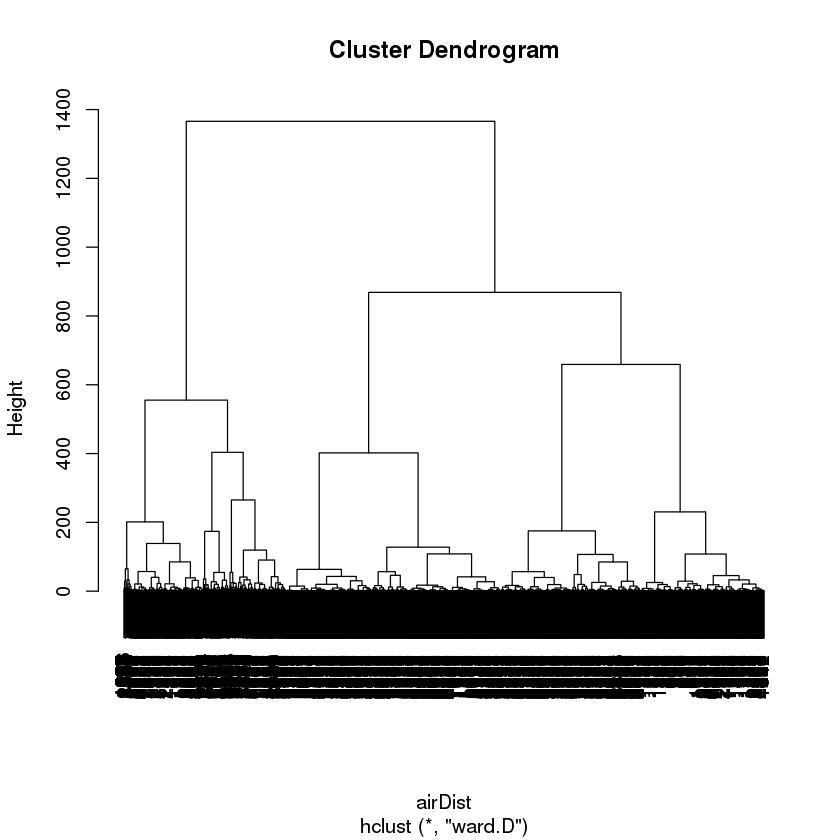

In [11]:
plot(airHeirClust)

In [12]:
airHierClusters = cutree(airHeirClust, k = 5)

In [13]:
table(airHierClusters)

airHierClusters
   1    2    3    4    5 
 776  519  494  868 1342 

In [21]:
airHierClustInd = split(airlines,airHierClusters)

In [22]:
colMeans(airHierClustInd[[1]])

Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   5.786690e+04    6.443299e-01    1.036012e+04    1.082345e+01    8.318428e+01 
    FlightTrans DaysSinceEnroll 
   3.028351e-01    6.235365e+03

In [23]:
tapply(airlines$DaysSinceEnroll, airHierClusters, mean)

1        2        3        4        5 
6235.365 4402.414 5615.709 2840.823 3060.081

In [24]:
lapply(split(airlines, airHierClusters), colMeans)

$`1`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   5.786690e+04    6.443299e-01    1.036012e+04    1.082345e+01    8.318428e+01 
    FlightTrans DaysSinceEnroll 
   3.028351e-01    6.235365e+03 

$`2`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   1.106693e+05    1.065983e+03    2.288176e+04    1.822929e+01    2.613418e+03 
    FlightTrans DaysSinceEnroll 
   7.402697e+00    4.402414e+03 

$`3`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   1.981916e+05    3.034615e+01    5.579586e+04    1.966397e+01    3.276761e+02 
    FlightTrans DaysSinceEnroll 
   1.068826e+00    5.615709e+03 

$`4`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   52335.913594        4.847926    20788.766129       17.087558      111.573733 
    FlightTrans DaysSinceEnroll 
       0.344470     2840.822581 

$`5`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   3.625591e+04    2.511177e+00    2.264788e+03    2.973174e+00    1.193219e+02 
    FlightTrans DaysSinceEnroll 
   4.388972e-01    3.060081e+03

In [25]:
set.seed(88)
KMC = kmeans(airlinesNorm, centers = 5,iter.max = 1000)

In [26]:
table(KMC$cluster)


   1    2    3    4    5 
 408  141  993 1182 1275 

In [28]:
table(KMC$cluster, airHierClusters)

   airHierClusters
       1    2    3    4    5
  1    4   92  300   12    0
  2    0  137    4    0    0
  3   98  105  132  653    5
  4  673   92   58   30  329
  5    1   93    0  173 1008